# Main File

TODO:
FEATURES    
IMPORTANCEhttps://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py


and InductiveClustering  https://scikit-learn.org/stable/auto_examples/cluster/plot_inductive_clustering.html#sphx-glr-auto-examples-cluster-plot-inductive-clustering-py

To sort file, increment by 1 the 2nd character.<br>If need to add an intermediate step: une the bisector (forward or backward) on the 3th character ( eg: forward M -> G , backward M->T)  <br> A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

In [19]:
#!pip install imgkit

In [7]:
%load_ext autoreload
%aimport functions
%autoreload 2

In [5]:
from pathlib import Path
from IPython.display import display, HTML
import joblib
import numpy as np
import pandas as pd
import geopandas as gpd

In [6]:
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
sns.set_theme(style="whitegrid", palette="Set2")

In [8]:
import sklearn
from sklearn.base import BaseEstimator, TransformerMixin, clone

from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA, KernelPCA, FactorAnalysis
from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding,
    MDS,
    SpectralEmbedding,
    TSNE,
)

from sklearn import metrics 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split, StratifiedGroupKFold, GroupShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import  Lasso, LassoLarsIC, LassoCV, LassoLarsCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.compose import make_column_transformer, ColumnTransformer, make_column_selector

from sklearn.metrics import homogeneity_score, make_scorer

In [9]:
from functions import KMeansTransformer

In [10]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

The process 'preprocess_01MM' take a lot of time therefore it is better to run it once.  
The result is saved in a file for later used.

## preprocess_01MM : Limites Administratives

In [26]:
# %run ./preprocess_01MM.ipynb

## preprocess_02MM : Arrondissements

(186, 5)


,IdenfiantSecteur,NomSecteur,IdentifiantArrondissement,ArrondissementCode,Arrondissement
0,4,RDP-91,17,RDP,R.D.P. / P.A.T.
1,4,RDP-91,17,RDP,R.D.P. / P.A.T.
2,5,RDP-92,17,RDP,R.D.P. / P.A.T.


(34, 9)


,CODEID,NOM,CODEMAMH,NUM,ABREV,TYPE,COMMENT,DATEMODIF,geometry
0,34,Anjou,REM09,9,AJ,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.60314 45.61113, -73.60230 ..."
1,33,Pointe-Claire,66097,8,PC,Ville liée,NaN,2022-08-24,"MULTIPOLYGON (((-73.76847 45.41859, -73.77866 ..."
2,18,Rosemont-La Petite-Patrie,REM24,25,RO,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.58711 45.56641, -73.58629 ..."


,ArrondissementCode,Arrondissement
0,RDP,R.D.P. / P.A.T.
19,VMA,Ville-Marie
24,S-O,Sud-Ouest
27,PMR,Plateau Mont-Royal
34,AHU,Ahuntsic / Cartierville
55,RPP,Rosemont / Petite-Patrie
74,VSP,Villeray / St-Michel / Parc-Extension
82,CDN,Côte-des-Neiges / Notre-Dame-de-Grâce
89,MHM,Mercier / Hochelaga / Maisonneuve
99,ANJ,Anjou


   ArrondissementCode ABREV
0                 RDP    RP
1                 VMA    VM
2                 S-O    SO
3                 PMR    PM
4                 AHU    AC
5                 RPP    RO
6                 VSP    VS
7                 CDN    CN
8                 MHM    MH
9                 ANJ    AJ
10                LAC    LC
11                LAS    LS
12                MTN    MN
13                OUT    OM
14                PRF    PR
15                SLA    LR
16                SLE    LN
17                VER    VD
18                IBI    IS
19                WES    WM
Index(['CODEID', 'NOM', 'CODEMAMH', 'NUM', 'ABREV', 'TYPE', 'COMMENT',
       'DATEMODIF', 'geometry', 'ArrondissementCode'],
      dtype='object')
(20, 10) (34, 38) (20, 49)


,CODEID,NOM,CODEMAMH,NUM,ABREV,TYPE,COMMENT,DATEMODIF,geometry,ArrondissementCode,index,n,m,k_avg,edge_length_total,edge_length_avg,streets_per_node_avg,intersection_count,street_length_total,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,streets_per_node_counts_0,streets_per_node_counts_1,streets_per_node_counts_2,streets_per_node_counts_3,streets_per_node_counts_4,streets_per_node_counts_5,streets_per_node_proportions_0,streets_per_node_proportions_1,streets_per_node_proportions_2,streets_per_node_proportions_3,streets_per_node_proportions_4,streets_per_node_proportions_5,streets_per_node_counts_6,streets_per_node_proportions_6,streets_per_node_counts_7,streets_per_node_proportions_7,streets_per_node_counts_8,streets_per_node_proportions_8,streets_per_node_counts_9,streets_per_node_proportions_9,streets_per_node_counts_10,streets_per_node_counts_11,streets_per_node_counts_12,streets_per_node_proportions_10,streets_per_node_proportions_11,streets_per_node_proportions_12
0,34,Anjou,REM09,9,AJ,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.60314 45.61113, -73.60230 ...",ANJ,AJ,3119,8532,5.470984,461789.932,54.124465,3.094902,2822,277921.879,4776,58.191348,1.065034,0.002513,0,297,9,1930,867,16.0,0.0,0.095223,0.002886,0.618788,0.277974,0.005130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,Rosemont-La Petite-Patrie,REM24,25,RO,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.58711 45.56641, -73.58629 ...",RPP,RO,6139,17057,5.556931,865298.849,50.729838,3.241082,5688,514283.343,9812,52.413712,1.039422,0.001529,0,451,14,3337,2282,51.0,0.0,0.073465,0.002281,0.543574,0.371722,0.008308,4.0,0.000652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22,Westmount,66032,4,WM,Ville liée,NaN,2022-08-24,"MULTIPOLYGON (((-73.59513 45.47645, -73.59469 ...",WES,WM,700,1933,5.522857,138408.943,71.603178,3.078571,633,76323.820,1046,72.967323,1.043247,0.000956,0,67,0,452,173,8.0,0.0,0.095714,0.000000,0.645714,0.247143,0.011429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16,Mercier-Hochelaga-Maisonneuve,REM22,23,MH,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((-73.56970 45.59660, -73.56947 ...",MHM,MH,6993,19688,5.630774,1056255.121,53.649691,3.232375,6403,626557.474,11231,55.788218,1.044986,0.002226,0,590,18,3623,2705,54.0,0.0,0.084370,0.002574,0.518090,0.386815,0.007722,2.0,0.000286,1.0,0.000143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,Le Sud-Ouest,REM20,21,SO,Arrondissement,Il est important de noter que la limite située...,2022-08-24,"MULTIPOLYGON (((-73.63530 45.45078, -73.63524 ...",S-O,SO,6375,18374,5.764392,876606.010,47.709046,3.242510,5876,513561.389,10220,50.250625,1.039018,0.001174,0,499,17,3373,2423,53.0,0.0,0.078275,0.002667,0.529098,0.380078,0.008314,8.0,0.001255,2.0,0.000314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(20, 49) (186, 5) (186, 53)


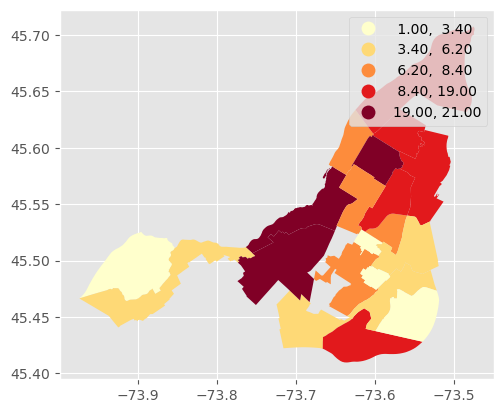

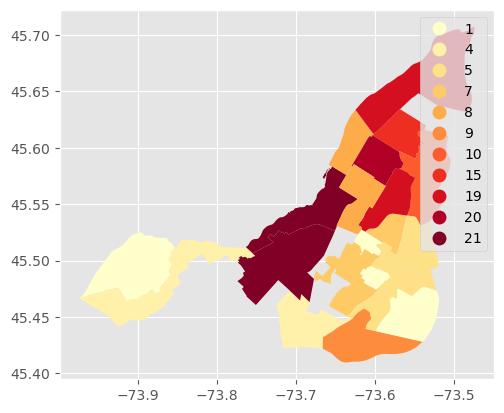

,secteur_count,area
ArrondissementCode,,
AHU,21,5.214740e+07
SLA,21,8.764706e+07
SLE,20,2.759526e+07
RDP,19,1.049463e+08
RPP,19,3.239825e+07
ANJ,15,2.839600e+07
MHM,10,5.594018e+07
LAS,9,5.118610e+07
VSP,8,3.361519e+07


THE END of preprocess 02MM


In [11]:
%run ./preprocess_02MM.ipynb

In [12]:
adm_features.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   CODEID                           20 non-null     int64   
 1   NOM                              20 non-null     object  
 2   CODEMAMH                         20 non-null     object  
 3   NUM                              20 non-null     int64   
 4   ABREV                            20 non-null     object  
 5   TYPE                             20 non-null     object  
 6   COMMENT                          2 non-null      object  
 7   DATEMODIF                        20 non-null     object  
 8   geometry                         20 non-null     geometry
 9   ArrondissementCode               20 non-null     object  
 10  index                            20 non-null     object  
 11  n                                20 non-null     int64   
 12  m 

In [29]:
#adm_secteur.info() # Not neede yet

## Preprocess_03MM : Weekly Snowfall 

(338809, 13)
(338809, 14)
(432015, 13)
(432015, 14)
(349543, 13)
(349541, 14)
(320395, 13)
(320275, 14)
(251395, 13)
(251334, 14)
(260680, 13)
(260569, 14)
(1952543, 16)
(1952543, 18)


,DateChargement,Idenfiantsecteur,NomSecteur,IdentifiantArrondissement,ArrondissementCode,Arrondissement,IdentifiantDepot,NomDepot,DateDechargement,volume,TypeTransaction,IdentifiantContrat,NuméroContrat,TypeDepot,IdenfiantSecteur,NumeroContrat,year,week
0,2016-12-13 10:45:02,104.0,SLA-353,13,SLA,Saint-Laurent,49,Thimens (SLA),2016-12-13 10:53:27,59.64,AUT,354.0,SLA-353,Entassement,NaN,NaN,2016,50
1,2016-12-13 11:11:01,104.0,SLA-353,13,SLA,Saint-Laurent,49,Thimens (SLA),2016-12-13 11:19:52,59.64,AUT,354.0,SLA-353,Entassement,NaN,NaN,2016,50
2,2016-12-13 11:35:02,104.0,SLA-353,13,SLA,Saint-Laurent,49,Thimens (SLA),2016-12-13 11:46:32,59.64,AUT,354.0,SLA-353,Entassement,NaN,NaN,2016,50
3,2016-12-13 10:57:00,104.0,SLA-353,13,SLA,Saint-Laurent,49,Thimens (SLA),2016-12-13 11:04:27,31.14,AUT,354.0,SLA-353,Entassement,NaN,NaN,2016,50


,DateChargement,Idenfiantsecteur,NomSecteur,IdentifiantArrondissement,ArrondissementCode,Arrondissement,IdentifiantDepot,NomDepot,DateDechargement,volume,TypeTransaction,IdentifiantContrat,NuméroContrat,TypeDepot,IdenfiantSecteur,NumeroContrat,year,week
260565,2022-02-28 06:44:00,NaN,AHU-104,22,AHU,Ahuntsic / Cartierville,28,Sauvé (AHU),2022-02-28 06:44:00,32.90,N-AUT,980.0,NaN,Chute_Egout,339.0,AHU-104,2022,9
260566,2022-10-14 09:05:40,NaN,VDM-01,28,VDM,Ville de Montréal,28,Sauvé (AHU),2022-10-14 09:05:40,0.00,N-AUT,1088.0,NaN,Chute_Egout,71.0,VDM,2022,41
260567,2022-03-01 07:56:00,NaN,AHU-104,22,AHU,Ahuntsic / Cartierville,28,Sauvé (AHU),2022-03-01 07:56:00,28.09,N-AUT,980.0,NaN,Chute_Egout,339.0,AHU-104,2022,9
260568,2022-01-19 16:20:00,NaN,AHU-104,22,AHU,Ahuntsic / Cartierville,28,Sauvé (AHU),2022-01-19 16:20:00,32.90,N-AUT,980.0,NaN,Chute_Egout,339.0,AHU-104,2022,3


['year', 'week', 'ArrondissementCode', 'TypeDepot']
[2016 2017 2018 2019 2020 2021 2022 2006]
[2016 2017 2018 2019 2020 2021 2022]
(1951968, 18)


volume
year week ArrondissementCode TypeDepot            
2016 48   SLA                Entassement     25.00
     49   AHU                Chute_Egout     55.00
          S-O                Chute_Egout    110.00
          SLA                Chute_Egout     55.00
                             Entassement    110.00
...                                            ...
2022 12   SLA                Entassement     30.50
          VMA                Carierre      1000.00
          VSP                Carierre     10760.00
     13   PMR                Chute_Egout     43.71
                             Entassement     32.69

[2218 rows x 1 columns]

,year,week,ArrondissementCode,TypeDepot,volume,yw
0,2016,48,SLA,Entassement,25.00,201648
1,2016,49,AHU,Chute_Egout,55.00,201649
2,2016,49,S-O,Chute_Egout,110.00,201649
3,2016,49,SLA,Chute_Egout,55.00,201649
4,2016,49,SLA,Entassement,110.00,201649
...,...,...,...,...,...,...
2213,2022,12,SLA,Entassement,30.50,202212
2214,2022,12,VMA,Carierre,1000.00,202212
2215,2022,12,VSP,Carierre,10760.00,202212
2216,2022,13,PMR,Chute_Egout,43.71,202213


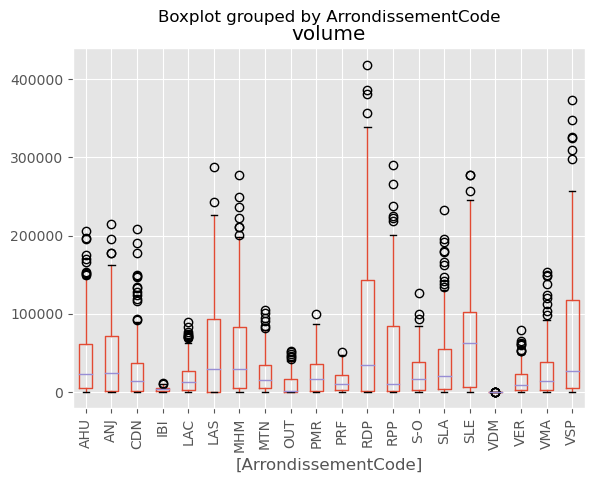

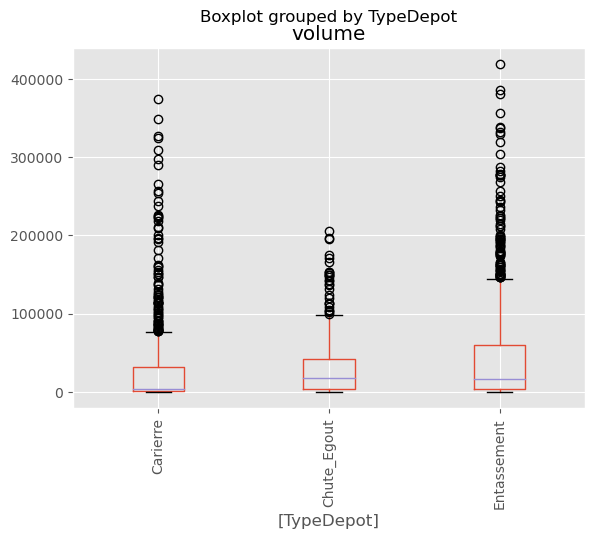

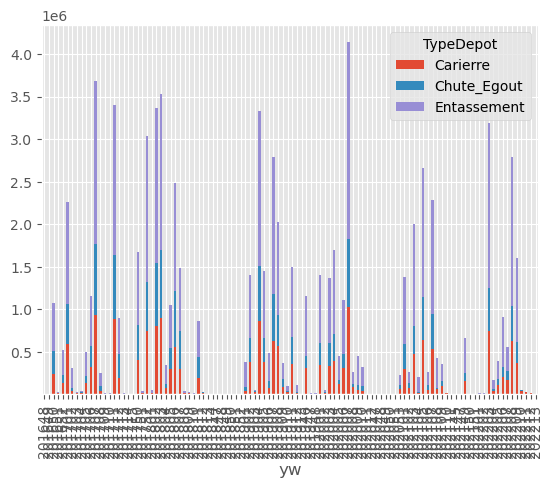

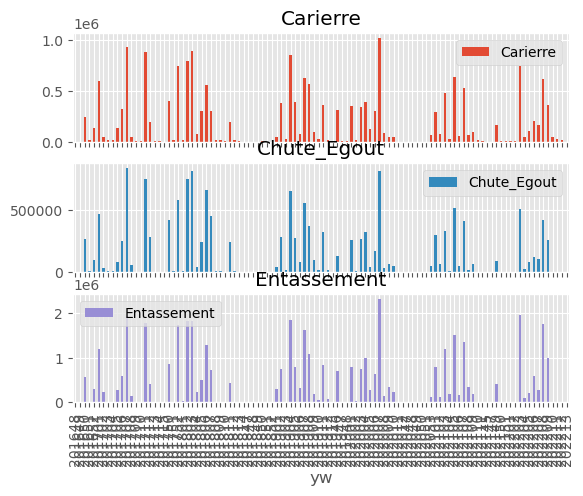

TypeDepot,Carierre,Chute_Egout,Entassement
ArrondissementCode,,,
AHU,2596238.57,4187673.98,696351.82
ANJ,467.39,0.00,4137885.07
CDN,745528.96,395836.28,3408333.31
IBI,0.00,0.00,234860.94
LAC,0.00,1034225.80,1475551.95
LAS,99.45,1396.87,4810711.89
MHM,27212.75,1983481.28,4945195.65
MTN,1707841.28,479065.05,1805789.39
OUT,616596.08,0.00,432500.38


,year,TypeDepot,volume
0,2016,Carierre,394900.83
1,2016,Chute_Egout,368576.00
2,2016,Entassement,865003.01
3,2017,Carierre,4369870.22
4,2017,Chute_Egout,3758712.66
5,2017,Entassement,9193198.54
6,2018,Carierre,3207664.93
7,2018,Chute_Egout,3207057.96
8,2018,Entassement,6904857.47
9,2019,Carierre,3783749.09


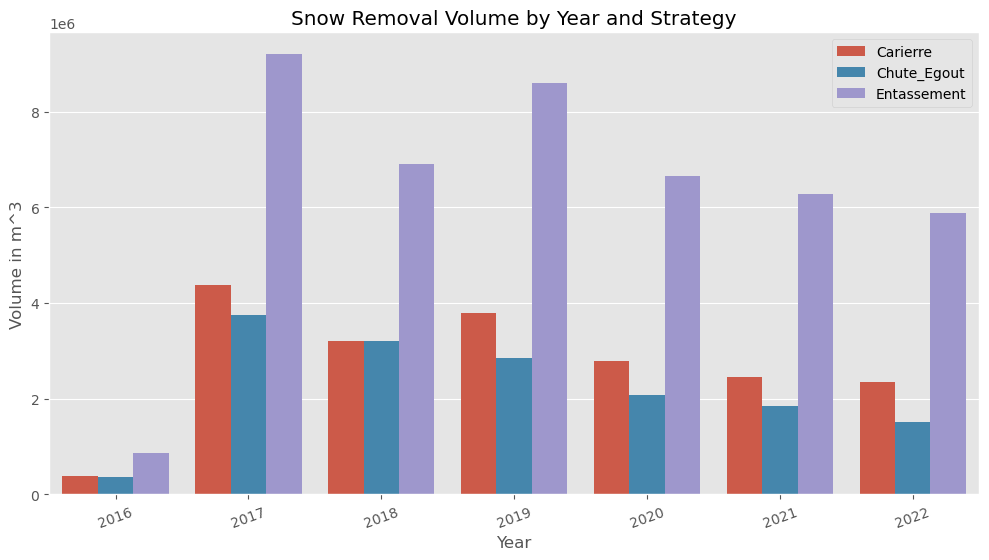

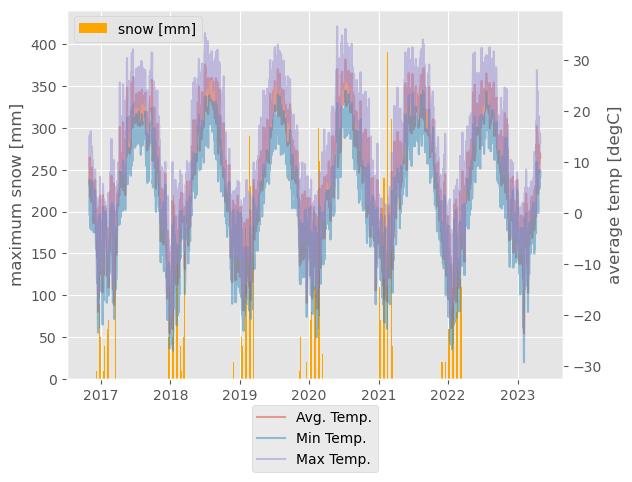

,w_tavg,w_tmin,w_tmax,w_prcp,w_snow,w_wdir,w_wspd,w_wpgt,w_pres,w_tsun,date,year,week
time,,,,,,,,,,,,,
2016-11-01,5.5,-0.3,11.2,0.4,NaN,127.0,13.6,NaN,1023.0,NaN,2016-11-01,2016,44
2016-11-02,10.9,6.6,15.2,0.0,NaN,NaN,8.5,NaN,1020.0,NaN,2016-11-02,2016,44
2016-11-03,8.2,5.6,10.7,10.0,NaN,9.0,11.6,NaN,1015.5,NaN,2016-11-03,2016,44
2016-11-04,3.1,0.5,5.6,0.4,NaN,288.0,14.8,NaN,1021.4,NaN,2016-11-04,2016,44
2016-11-05,5.4,2.2,8.6,1.2,NaN,NaN,8.8,NaN,1018.9,NaN,2016-11-05,2016,44


,year,week,w_snow,w_tavg,w_tmin,w_tmax,w_wspd,w_prcp
0,2016,44,0.0,6.150000,-1.6,15.2,11.583333,12.4
1,2016,45,0.0,5.457143,-3.3,16.0,19.357143,2.0
2,2016,46,10.0,5.928571,-1.1,13.1,14.966667,18.6
3,2016,47,160.0,-0.314286,-3.8,2.5,16.033333,9.2
4,2016,48,0.0,1.985714,-3.9,8.5,18.657143,36.0
...,...,...,...,...,...,...,...,...
335,2023,14,0.0,2.542857,-4.0,10.0,18.971429,33.0
336,2023,15,0.0,13.785714,1.0,28.0,20.457143,0.1
337,2023,16,0.0,8.071429,0.0,19.0,21.800000,43.0
338,2023,17,0.0,9.685714,4.8,15.7,13.342857,8.0


(2218, 6) (2218, 12)


,year,week,ArrondissementCode,TypeDepot,volume,yw,w_snow,w_tavg,w_tmin,w_tmax,w_wspd,w_prcp
0,2016,48,SLA,Entassement,25.00,201648,0.0,1.985714,-3.9,8.5,18.657143,36.0
1,2016,49,AHU,Chute_Egout,55.00,201649,220.0,-4.214286,-13.7,3.1,14.485714,11.4
2,2016,49,S-O,Chute_Egout,110.00,201649,220.0,-4.214286,-13.7,3.1,14.485714,11.4
3,2016,49,SLA,Chute_Egout,55.00,201649,220.0,-4.214286,-13.7,3.1,14.485714,11.4
4,2016,49,SLA,Entassement,110.00,201649,220.0,-4.214286,-13.7,3.1,14.485714,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2213,2022,12,SLA,Entassement,30.50,202212,0.0,1.957143,-9.5,9.0,19.257143,34.2
2214,2022,12,VMA,Carierre,1000.00,202212,0.0,1.957143,-9.5,9.0,19.257143,34.2
2215,2022,12,VSP,Carierre,10760.00,202212,0.0,1.957143,-9.5,9.0,19.257143,34.2
2216,2022,13,PMR,Chute_Egout,43.71,202213,0.0,-0.385714,-12.2,10.1,18.828571,4.2


year  ArrondissementCode
2016  AHU                   [55.0, 31869.52, 69278.67, 671.42, 17731.16, 3...
      ANJ                                [179.79, 50151.33, 2536.3, 32212.85]
      CDN                   [12808.51, 25829.48, 31529.96, 616.13, 5725.3,...
      IBI                                                           [3201.33]
      LAC                   [16109.4, 20590.55, 901.8000000000001, 2484.8,...
                                                  ...                        
2022  SLE                   [618.8399999999999, 199377.63999999998, 6789.1...
      VDM                   [4.0, 2.0, 1.0, 30.8, 1.0, 259.48, 351.26, 2.0...
      VER                   [48123.89, 17651.329999999998, 9728.56, 10232....
      VMA                   [300.0, 320.0, 2748.66, 103443.22, 40561.5, 19...
      VSP                   [7165.0, 1225.0, 244020.15, 248.0, 19185.0, 36...
Name: volume, Length: 136, dtype: object

Score: 0.142	Num Cluster: 2
Score: 0.090	Num Cluster: 3
Score: 0.123	Num Cluster: 4
Score: 0.128	Num Cluster: 5
Score: 0.133	Num Cluster: 6
Score: 0.143	Num Cluster: 7
Score: 0.166	Num Cluster: 8
Score: 0.156	Num Cluster: 9
Score: 0.152	Num Cluster: 10
Score: 0.135	Num Cluster: 11
Score: 0.101	Num Cluster: 12
Score: 0.098	Num Cluster: 13
Score: 0.097	Num Cluster: 14
Score: 0.123	Num Cluster: 15
Score: 0.078	Num Cluster: 16
Score: 0.115	Num Cluster: 17
Score: 0.127	Num Cluster: 18
Score: 0.086	Num Cluster: 19
Score: 0.082	Num Cluster: 20
Best Model has 0.16616282047466296 of Silhouette Score and 8 clusters


,year,ArrondissementCode,volume,labels
0,2016,AHU,"[55.0, 31869.52, 69278.67, 671.42, 17731.16, 3...",3
1,2016,ANJ,"[179.79, 50151.33, 2536.3, 32212.85]",3
2,2016,CDN,"[12808.51, 25829.48, 31529.96, 616.13, 5725.3,...",1
3,2016,IBI,[3201.33],5
4,2016,LAC,"[16109.4, 20590.55, 901.8000000000001, 2484.8,...",1
...,...,...,...,...
131,2022,SLE,"[618.8399999999999, 199377.63999999998, 6789.1...",3
132,2022,VDM,"[4.0, 2.0, 1.0, 30.8, 1.0, 259.48, 351.26, 2.0...",3
133,2022,VER,"[48123.89, 17651.329999999998, 9728.56, 10232....",6
134,2022,VMA,"[300.0, 320.0, 2748.66, 103443.22, 40561.5, 19...",7


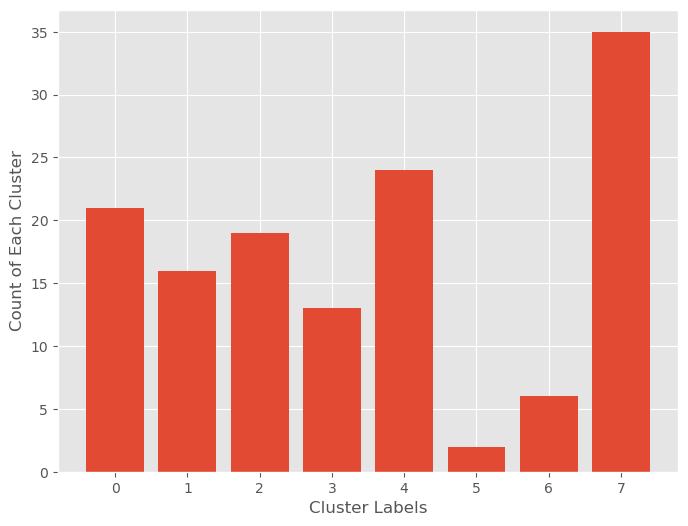

,year,ArrondissementCode,labels
0,2016,AHU,3
1,2016,ANJ,3
2,2016,CDN,1
3,2016,IBI,5
4,2016,LAC,1
...,...,...,...
131,2022,SLE,3
132,2022,VDM,3
133,2022,VER,6
134,2022,VMA,7


In [3]:
%run ./weekly_snowfall_v2.ipynb

In [4]:
#output_volume_series_labels = joblib.load(Path('..','data','generated','descriptive_data.joblib'))
output_volume_series_labels

,year,ArrondissementCode,labels
0,2016,AHU,3
1,2016,ANJ,3
2,2016,CDN,1
3,2016,IBI,5
4,2016,LAC,1
...,...,...,...
131,2022,SLE,3
132,2022,VDM,3
133,2022,VER,6
134,2022,VMA,7


## PIPELINE

In [32]:
# view : https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_set_output.html
from sklearn import set_config, config_context
#set_config(transform_output="pandas")

In [33]:
#X_train, X_test, rest_train, rest_test = train_test_split(X, rest, test_size=0.30, random_state=42
#                                                    , stratify=gdf[y_cluster[0]])

y_train = adm_features['ArrondissementCode']
y_train = adm_features['NOM']

X_train = adm_features.copy()
X_train = X_train.drop(columns=['geometry','index','NOM','CODEID','CODEMAMH','NUM','ABREV','DATEMODIF','ArrondissementCode']).copy()
print(X_train.columns)

Index(['TYPE', 'COMMENT', 'n', 'm', 'k_avg', 'edge_length_total',
       'edge_length_avg', 'streets_per_node_avg', 'intersection_count',
       'street_length_total', 'street_segment_count', 'street_length_avg',
       'circuity_avg', 'self_loop_proportion', 'streets_per_node_counts_0',
       'streets_per_node_counts_1', 'streets_per_node_counts_2',
       'streets_per_node_counts_3', 'streets_per_node_counts_4',
       'streets_per_node_counts_5', 'streets_per_node_proportions_0',
       'streets_per_node_proportions_1', 'streets_per_node_proportions_2',
       'streets_per_node_proportions_3', 'streets_per_node_proportions_4',
       'streets_per_node_proportions_5', 'streets_per_node_counts_6',
       'streets_per_node_proportions_6', 'streets_per_node_counts_7',
       'streets_per_node_proportions_7', 'streets_per_node_counts_8',
       'streets_per_node_proportions_8', 'streets_per_node_counts_9',
       'streets_per_node_proportions_9', 'streets_per_node_counts_10',
       'st

In [93]:
def projectTSNE(X,n_components=2, random_state=0,  perplexity=None ):
    e = TSNE(n_components=n_components, random_state=random_state, perplexity=perplexity )
    return e.fit_transform(X)


class Model(Pipeline):
   
   #def __init__(self):
    #super(Model, self).__init__()


    def labels(self):
        #return self['estimator']['clusterer'].labels_
        return self['estimator'].clusterer.labels_
        #return self[:-1].labels_

    def project(self, n_components=2, random_state=0,  perplexity=None):
         return projectTSNE(self['transformer'].X_transformed_fit_,n_components=n_components, 
                            random_state=random_state,perplexity=perplexity)
        
    def plot_pipeline(self,filename, df):
        from mlinsights.plotting import pipeline2dot
        from pyquickhelper.loghelper import run_cmd
        dot = pipeline2dot(self, df)
        with open(filename, "w", encoding="utf-8") as f:
            f.write(dot)
        cmd = "dot -G=300 -Tpng {0} -o{0}.png".format(filename)
        run_cmd(cmd, wait=True, fLOG=print);


    def classes_(self):
        """The classes labels. Only exist if the last step is a classifier."""
        return self.steps[-1][0].classes_


    def transform(self, X):
        return self[-1].transform(X)

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)  


def build_pipeline(estimator, transformer, scaling=True, transformer_weights=None, memory=None):
    """ Build a robust pipeline with the given estimator model
    Keyword arguments:
    scaling -- whether or not to scale the data
    
    Returns: a pipeline
    """
    cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), 
                             OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    num_pipe = make_pipeline(SimpleImputer(strategy='median'))
    
    numerical = make_column_selector(dtype_include=np.number)
    #categorical = make_column_selector(dtype_include=object)
    categorical = make_column_selector(dtype_exclude=np.number)    
    
    if scaling:
        num_pipe.steps.insert(1,["scaler", MinMaxScaler()]) 
        
    if estimator.__class__.__name__ == 'MeanShift':
        # The following bandwidth can be automatically detected using
        bandwidth = estimate_bandwidth(quantile=0.2, n_samples=500)
        estimator.set_params('bndwidth',bandwidth)

    preprocess = ColumnTransformer([('cat',cat_pipe, categorical),
                                    ('num',num_pipe,numerical)],
                                   remainder="drop",#"passthrough",
                                  transformer_weights=transformer_weights)
     
    # Give a name to the estimator and last transformer so that we can tune it more easily
    return Model(steps=[('preprocess', preprocess), ('transformer',transformer)
                           , ('estimator', estimator)]
                   , memory= memory
                   )

    #preprocess = make_column_transformer((cat_pipe, categorical),(num_pipe,numerical), remainder="passthrough")    
    #combined = FeatureUnion(estimators)

In [94]:
%reload_ext functions
import functions

In [95]:


# Create a temporary folder to store the transformers of the pipeline
location = "cachedir"
memory = Memory(location=location, verbose=10)

In [96]:
# TODO: adjust: transformer_weights between geo* and *time*
n_neighbors = 8
transformer_1 =  KernelPCA(n_components=2, kernel="rbf", gamma=10, alpha=0.1,
                         fit_inverse_transform=True)

transformer = make_pipeline(transformer_1)
estimator = functions.InductiveClusterer(clusterer=KMeans(n_clusters=5, n_init='auto'), classifier=RandomForestClassifier(n_estimators=80))

filename = Path('..','media','pipeline_clustering')

model = build_pipeline(estimator=estimator, transformer= transformer, scaling=True, memory=memory)
#model.feature_names_in = X_train.columns.to_list()
#model.set_output(transform='pandas')

display(model)

#Looking up parameters that can be passed to the pipeline
print(model.get_params().keys())

Model(memory=Memory(location=cachedir/joblib),
      steps=[('preprocess',
              ColumnTransformer(transformers=[('cat',
                                               Pipeline(steps=[('simpleimputer',
                                                                SimpleImputer(strategy='most_frequent')),
                                                               ('onehotencoder',
                                                                OneHotEncoder(handle_unknown='ignore',
                                                                              sparse_output=False))]),
                                               <sklearn.compose._column_transformer.make_column_selector object at 0x286930610>),
                                              ('num',
                                               Pipel...
                                                                MinMaxScaler()]]),
                                               <sklearn.compose._column_transformer.make_column_selector object at 0x286930e50>)])),
             ('transformer',
              Pipeline(steps=[('kernelpca',
                               KernelPCA(alpha=0.1, fit_inverse_transform=True,
                                         gamma=10, kernel='rbf',
                                         n_components=2))])),
             ('estimator',
              InductiveClusterer(classifier=RandomForestClassifier(n_estimators=80),
                                 clusterer=KMeans(n_clusters=5,
                                                  n_init='auto')))])

dict_keys(['memory', 'steps', 'verbose', 'preprocess', 'transformer', 'estimator', 'preprocess__n_jobs', 'preprocess__remainder', 'preprocess__sparse_threshold', 'preprocess__transformer_weights', 'preprocess__transformers', 'preprocess__verbose', 'preprocess__verbose_feature_names_out', 'preprocess__cat', 'preprocess__num', 'preprocess__cat__memory', 'preprocess__cat__steps', 'preprocess__cat__verbose', 'preprocess__cat__simpleimputer', 'preprocess__cat__onehotencoder', 'preprocess__cat__simpleimputer__add_indicator', 'preprocess__cat__simpleimputer__copy', 'preprocess__cat__simpleimputer__fill_value', 'preprocess__cat__simpleimputer__keep_empty_features', 'preprocess__cat__simpleimputer__missing_values', 'preprocess__cat__simpleimputer__strategy', 'preprocess__cat__simpleimputer__verbose', 'preprocess__cat__onehotencoder__categories', 'preprocess__cat__onehotencoder__drop', 'preprocess__cat__onehotencoder__dtype', 'preprocess__cat__onehotencoder__handle_unknown', 'preprocess__cat__on

In [124]:

from sklearn.datasets import make_blobs

def my_silhouette_score(estimator, X, y=None):
    labels = estimator.predict(X)
    #labels = estimator.fit_predict(X)
    print(labels)
    try:
        score = sklearn.metrics.silhouette_score(X, labels, metric='euclidean')
        # score = sklearn.metrics.calinski_harabasz_score(X, labels)
    except ValueError:
        score = -1  # float('nan')
    return score    


scorer = make_scorer(my_silhouette_score)


pgrid = {
    #'transformer__kmeanstransformer__n_clusters': np.arange(2, 5),
    'transformer__kernelpca__n_components': np.arange(2, 4),
    'transformer__kernelpca__gamma':np.arange(2, 10),
    #'transformer__kernelpca__alpha':[0.1, 0.2]
    'estimator__clusterer__n_clusters': np.arange(3,6)
}

# cv=[(slice(None), slice(None))]to get rid from the  cross validation
cv=[(slice(None), slice(None))]
                       
gs = GridSearchCV(model, pgrid, 
                  #scoring=scorer,
                    cv=cv,
                  #refit='my_silhouette_score',
                  error_score=-1)


data, labels = sklearn.datasets.make_classification(n_samples=32, n_features=23, n_classes=5, n_clusters_per_class=2, 
                                                    n_informative=10, n_redundant=2, n_repeated=0)


XX = pd.DataFrame(data)
#print(XX)
gs.fit(XX, labels)
#gs.fit(XX)
#print(gs.best_params_)
#best_estimator = gs.best_estimator_
#print(best_estimator)
#highest_silhouette_score = gs.score(X_train)
#print(highest_silhouette_score)

y_pred = gs.predict(XX)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x285f52910>),
                                ('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ['scaler', MinMaxScaler()]]),
             

/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to -1. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/Users/cimadure/Documents/code/mine/ind6212/notebooks/functions.py", line 73, in score
    return self.classifier_.score(X,y)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accu

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(Pipeline(steps=[('kernelpca',
                 KernelPCA(alpha=0.1, fit_inverse_transform=True, gamma=4,
                           kernel='rbf', n_components=2))]), 
array([[0.718866, ..., 0.582134],
       ...,
       [0.23173 , ..., 0.284929]]), 
None, None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
___________

/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to -1. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/Users/cimadure/Documents/code/mine/ind6212/notebooks/functions.py", line 73, in score
    return self.classifier_.score(X,y)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accu

________________________________________________fit_transform_one - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(Pipeline(steps=[('kernelpca',
                 KernelPCA(alpha=0.1, fit_inverse_transform=True, gamma=6,
                           kernel='rbf', n_components=3))]), 
array([[0.718866, ..., 0.582134],
       ...,
       [0.23173 , ..., 0.284929]]), 
None, None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________

/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to -1. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/Users/cimadure/Documents/code/mine/ind6212/notebooks/functions.py", line 73, in score
    return self.classifier_.score(X,y)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accu

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(Pipeline(steps=[('kernelpca',
                 KernelPCA(alpha=0.1, fit_inverse_transform=True, gamma=8,
                           kernel='rbf', n_components=3))]), 
array([[0.718866, ..., 0.582134],
       ...,
       [0.23173 , ..., 0.284929]]), 
None, None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
___________

/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to -1. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/Users/cimadure/Documents/code/mine/ind6212/notebooks/functions.py", line 73, in score
    return self.classifier_.score(X,y)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accu

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/3f275ae61da69a3137b75d34beb05749
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/0717b346661d91d563e08dd840984d10
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transfor

/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to -1. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/Users/cimadure/Documents/code/mine/ind6212/notebooks/functions.py", line 73, in score
    return self.classifier_.score(X,y)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accu

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e5088d8254c48524f28cf4667e600c1d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/974b9e9e9bc44401413e6a10e6c62193
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transfor

/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to -1. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/Users/cimadure/Documents/code/mine/ind6212/notebooks/functions.py", line 73, in score
    return self.classifier_.score(X,y)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accu

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/ad3c75d5ece32f290c07f4411bf450f8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/abcc184fdf6992cc9ca657b2c93b8350
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transfor

/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to -1. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/Users/cimadure/Documents/code/mine/ind6212/notebooks/functions.py", line 73, in score
    return self.classifier_.score(X,y)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accu

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/efeb89110b491ff65b63e30b722fff92
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/3f275ae61da69a3137b75d34beb05749
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transfor

/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to -1. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/Users/cimadure/Documents/code/mine/ind6212/notebooks/functions.py", line 73, in score
    return self.classifier_.score(X,y)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accu

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/2d7c119c92865e32273f5349adc4b3c8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/e5088d8254c48524f28cf4667e600c1d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transfor

/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to -1. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/Users/cimadure/Documents/code/mine/ind6212/notebooks/functions.py", line 73, in score
    return self.classifier_.score(X,y)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accu

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/c78fae8af2863ba6f03c124f4863d5e1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/ad3c75d5ece32f290c07f4411bf450f8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transfor

/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to -1. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/Users/cimadure/Documents/code/mine/ind6212/notebooks/functions.py", line 73, in score
    return self.classifier_.score(X,y)
  File "/opt/anaconda3/envs/ind6212/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accu

In [125]:
print(labels)
print(y_pred)

[0 2 3 2 1 1 1 3 2 1 3 2 4 0 3 0 2 4 0 3 0 4 4 1 4 1 2 3 1 4 0 0]
[0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 2 0 2 0 0 0 0 2 1 0 0 0 2 0 0 0]


{'estimator__clusterer__n_clusters': 3, 'transformer__kernelpca__gamma': 2, 'transformer__kernelpca__n_components': 2}


<Axes: >

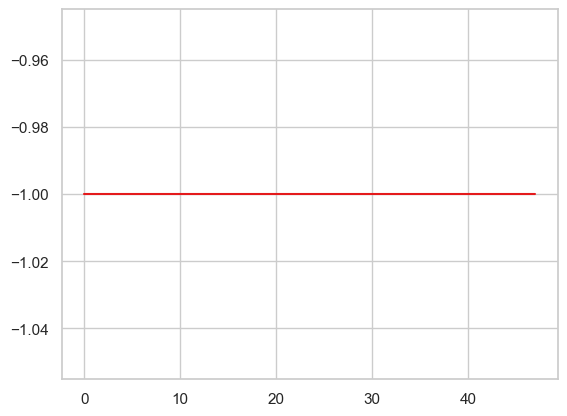

In [126]:
#vars(gs)
print(gs.best_params_)
result = pd.DataFrame(gs.cv_results_)
#display(result)
result['mean_test_score'].plot()

#print(model.get_params('composite__visualizer__perplexity'))
 Test 1 : NO position = StandardScaler().fit_transform(position)
 Test 2: Still on the top of each other
n_neighbors = 2
man = SpectralEmbedding(n_components=2, n_neighbors=n_neighbors)
position = man.fit_transform(position)
man = Isomap(n_neighbors=n_neighbors, n_components=2)
position = man.fit_transform(position)

In [127]:
#vars(gs)
#model.fit(X_train)
model.fit(XX)
print(model[:-1].get_feature_names_out() )

#model[-2].X_transformed_fit_
YY = model[:-2].fit_transform(XX)
print(YY)
#X_Transf = transformer_1.X_transformed_fit_

X_Transf = YY

print(X_Transf)




[Memory]1095.1s, 18.3min: Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/22d427e57e4e14168fedeb86b6251d58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(Pipeline(steps=[('kernelpca',
                 KernelPCA(alpha=0.1, fit_inverse_transform=True, gamma=10,
                           kernel='rbf', n_components=2))]), 
array([[0.718866, ..., 0.582134],
       ...,
       [0.23173 , ..., 0.284929]]), 
None, None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
['kernelpca0' 'kernelpca1']
[[0.71886583 0.68335405 0.81045185 0.44497361 0.83666275 0.76068508
  0.66086816 0.39516904 0.55065039 0.08497816 0.7277469  0.87710964
  0.21052731 0.10163891 0.68012875 1.         0.20769498 0.23397415
  

In [128]:
#gs.get_params.clusterer.labels_
gs.classes_

<bound method Model.classes_ of Model(memory=Memory(location=cachedir/joblib),
      steps=[('preprocess',
              ColumnTransformer(transformers=[('cat',
                                               Pipeline(steps=[('simpleimputer',
                                                                SimpleImputer(strategy='most_frequent')),
                                                               ('onehotencoder',
                                                                OneHotEncoder(handle_unknown='ignore',
                                                                              sparse_output=False))]),
                                               <sklearn.compose._column_transformer.make_column_selector object at 0x285fba910>),
                                              ('num',
                                               Pipel...
                                                                MinMaxScaler()]]),
                                          

number of estimated clusters : 3


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,group,Arrondissement,area,manifold0,manifold1
16,0.137931,2.749088,-1.750354,-0.255811,0.805804,-0.099084,0.816135,-0.196382,1.280282,0.457500,0.053592,-3.094504,0.294055,4.418317,0.188008,2.590677,-1.767903,0.654378,0.221645,-0.832799,11.388762,0.136287,1.349712,2,Ville-Marie,4.378179e+07,-27.158518,-27.922636
28,1.897234,-0.362908,-2.507289,-0.305382,0.420075,1.318290,0.314780,-0.136087,-0.370435,0.667905,0.062930,-1.525248,-0.290629,1.604040,1.384286,1.434740,-1.168675,-0.916012,-0.197864,-0.090946,4.919823,0.001531,0.182942,2,NaN,NaN,-24.532450,-19.890671
23,2.679419,2.988383,-1.752252,-0.060141,3.506793,3.220269,-0.055011,-1.196118,-0.133318,0.711896,0.271752,-0.786685,0.262130,0.229440,0.760731,0.631103,0.287524,-2.144403,0.149563,-1.717019,1.715815,0.384553,-0.275548,2,NaN,NaN,-32.578018,-17.468990
18,2.018838,2.195764,1.632242,1.014103,2.028612,1.740686,-0.900783,-1.335726,-1.352313,-0.132040,0.960377,-1.710611,-0.088157,-0.906099,1.568912,4.522685,-0.736325,-1.036412,0.777596,-1.133672,1.083466,-1.645376,0.148409,2,Saint-Laurent,8.764706e+07,-39.694435,-13.334015
4,-2.874788,0.729200,1.589034,1.180788,0.855524,-2.693940,-0.741819,-0.575080,1.075800,0.303203,0.812242,-1.074495,1.366115,1.014706,0.844703,-0.449319,0.794154,1.718435,0.065265,-0.170986,2.697455,-0.332238,0.469789,1,Le Sud-Ouest,3.680719e+07,15.082112,-1.963889
5,-2.294053,2.237949,1.985111,-0.590137,1.661027,-0.767350,-1.681557,0.673501,-0.874119,-1.325726,-0.032654,-0.354051,1.162331,0.458372,-0.808637,-0.265356,0.372000,1.510808,0.964435,2.065739,-1.128027,-0.761810,-0.333035,1,Rivière-des-Prairies-Pointe-aux-Trembles,1.049463e+08,24.503771,11.483578
8,-1.413472,1.255749,2.173071,0.774987,-1.353515,-0.617998,0.557568,-0.537085,1.253585,-0.848209,-0.202143,0.733149,0.490782,0.348221,-0.235687,0.351650,-0.978034,-0.158911,-0.887477,-0.251792,-0.489881,1.578492,1.352862,1,Lachine,4.584992e+07,6.937778,13.208014
10,0.492436,-0.015011,0.797405,1.011261,1.781162,-1.905444,-0.591700,1.172808,1.130313,1.463847,0.708020,-1.472875,2.332580,-1.236905,-1.040526,-0.710197,0.922743,-0.660627,-0.358639,0.607190,0.947065,-0.874431,-0.324476,1,Villeray-Saint-Michel-Parc-Extension,3.361519e+07,8.456142,-13.656561
24,-2.591618,-0.081218,2.399107,-0.383513,2.200031,-1.462910,2.487123,-0.359286,-0.901610,-0.322213,0.176050,-0.723946,-0.029829,0.850573,1.431618,-0.374610,-0.691679,1.290464,0.871082,0.665615,2.549039,-0.034586,-0.824127,1,NaN,NaN,19.349276,5.912568
13,-1.045281,-0.319886,1.232401,0.513514,-0.167967,-2.300011,-1.423973,0.893696,1.851928,0.167100,0.922465,3.013734,-0.431364,-1.005569,-0.124855,-0.259932,0.350981,1.086048,0.759778,-1.058934,-3.045228,0.720363,-0.142446,1,Ahuntsic-Cartierville,5.214740e+07,7.321499,4.052147


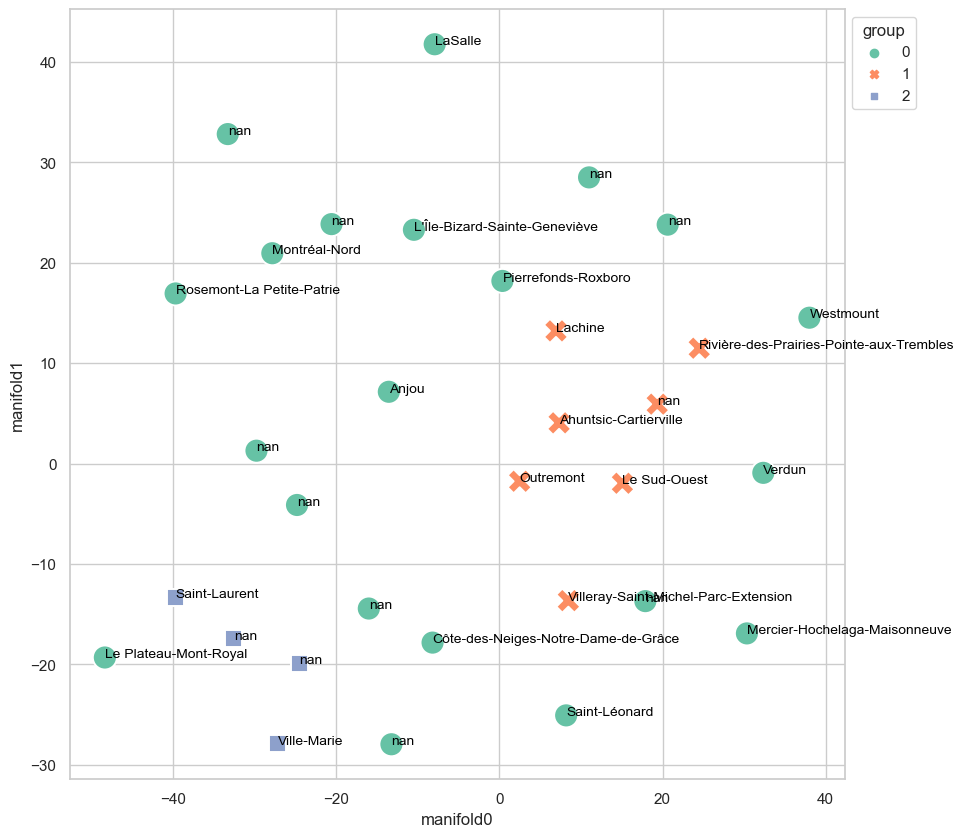

In [129]:
#gs.fit(X_train)

#proj = model.project(n_components=2, perplexity=n_neighbors)
#X_Transf = gs.transformer__kernelpca__X_transformed_fit_

#X_Transf = transformer_1.X_transformed_fit_
#X_Transf = transformer_1.fit_transform(X_train)

Xor = X_Transf

proj = projectTSNE(Xor,n_components=2, random_state=0,  perplexity=n_neighbors )

with config_context(transform_output="pandas"):
    #reduced_data = model.transform(X_train)
    #reduced_data = model.fit_transform(XX, labels)
    reduced_data = XX
#    #display(reduced_data.head())    


#reduced_data = model[-2].transform(X_train)
#reduced_data = model[-2].fit_transform(X_train)

#labels = model.labels()
labels = y_pred

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

reduced_data['group'] = labels
reduced_data['Arrondissement'] = y_train
reduced_data['area'] = adm_features['area']
reduced_data['manifold0'] = proj[:,0]
reduced_data['manifold1'] = proj[:,1]


sort = reduced_data.sort_values("group", ascending=False)
display(sort)


filename = Path('..','media','clustering_redu'+str(n_clusters_)+'.png')

#sns.set(style="darkgrid")
sns.set_theme(style="whitegrid", palette="Set1")

fig, ax = plt.subplots(figsize=(10,10))
g = sns.scatterplot(
#g = sns.regplot(    
    data=reduced_data,
    x="manifold0", y="manifold1",
    hue="group", style="group",
    #size="area",
    s=300,
    palette="Set2")

#ax.set(xscale="log", yscale="log")

for i,d in reduced_data.T.items():
    plt.text(d['manifold0'],d['manifold1'],d['Arrondissement'], horizontalalignment='left', size='small', color='black')

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

plt.show()

fig.savefig(filename)  

In [ ]:

# Delete the temporary cache before exiting
memory.clear(warn=False)
rmtree(location)

https://scikit-learn.org/stable/auto_examples/cluster/plot_inductive_clustering.html#sphx-glr-auto-examples-cluster-plot-inductive-clustering-py  
Clustering then Classification    

# COULD  USE SECTORS instead of ARRONDISSEMENTS IN ORDER TO INCREASE THE NUMBER OF SAMPLES



# ALSO HOW TO IMPROVE https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
